In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import datetime
#import statsmodels.api as sm
sns.set()
%matplotlib inline
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')

In [2]:
news = pd.read_csv('./Dataset/News_Final.csv',parse_dates=['PublishDate'])
fe = pd.read_csv('./Dataset/Facebook_Economy.csv')

In [ ]:
news.head(5)

In [ ]:
### Do we need to remove the value on 2002 and 2008?
year_distribute = news.PublishDate.apply(lambda x : x.year)
year_distribute.value_counts()

In [3]:
#keep the news that is on all three platforms
F = news[news['Facebook']>0].Facebook
L = news[news['LinkedIn']>0].LinkedIn
G = news[news['GooglePlus']>0].GooglePlus
news['num_platform'] = news["Facebook"].map(str) + ',' + news["GooglePlus"].map(str)+  ',' + news['LinkedIn'].map(str)
news['num_platform'] = news['num_platform'].apply(lambda x: [int(num) for num in x.split(',')])
news['num_platforms'] = news['num_platform'].apply(lambda x: 3 - x.count(-1)-x.count(0))
news_df = news[news['num_platforms']==3]

#generate datetime columns for further use
news_df['Publish_Year'] = news_df.PublishDate.apply(lambda x : x.year)
news_df['Publish_Month'] = news_df.PublishDate.apply(lambda x : x.month)
news_df['Publish_Day'] = news_df.PublishDate.apply(lambda x : x.day)
news_df['Publish_weekday'] = news_df.PublishDate.apply(lambda x : x.weekday())

In [11]:
weekday_pop_median = news_df.groupby('Publish_weekday')['Facebook'].median().reset_index()
weekday_pop_mean = news_df.groupby('Publish_weekday')['Facebook'].mean().reset_index()

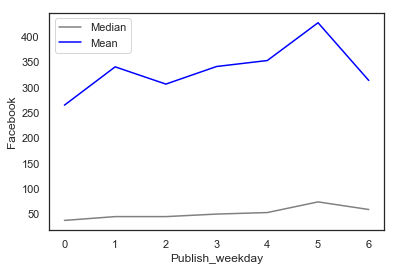

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
ax1 = sns.lineplot(weekday_pop_median['Publish_weekday'],weekday_pop_median['Facebook'],color='grey',label='Median')
ax2 = sns.lineplot(weekday_pop_mean['Publish_weekday'],weekday_pop_mean['Facebook'],color='blue',label='Mean')


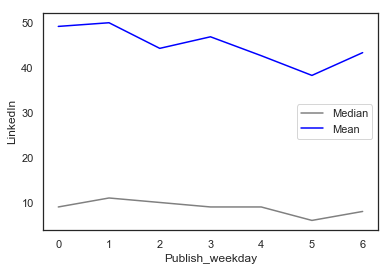

In [18]:
weekday_pop_l_median = news_df.groupby('Publish_weekday')['LinkedIn'].median().reset_index()
weekday_pop_l_mean = news_df.groupby('Publish_weekday')['LinkedIn'].mean().reset_index()
ax1 = sns.lineplot(weekday_pop_median['Publish_weekday'],weekday_pop_l_median['LinkedIn'],color='grey',label='Median')
ax2 = sns.lineplot(weekday_pop_mean['Publish_weekday'],weekday_pop_l_mean['LinkedIn'],color='blue',label='Mean')

In [19]:
news_df.columns

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn', 'num_platform', 'num_platforms', 'Publish_Year',
       'Publish_Month', 'Publish_Day', 'Publish_weekday'],
      dtype='object')

In [21]:
# news_df.groupby('Face_pop_rank')['SentimentTitle'].median().reset_index()

In [22]:
df = pd.read_csv('preprocessed_text_news_df.csv')

In [23]:
df_x = pd.read_csv('X.csv')

In [24]:
df.columns

Index(['Unnamed: 0', 'IDLink', 'Title', 'Headline', 'Source', 'Topic',
       'PublishDate', 'SentimentTitle', 'SentimentHeadline', 'Facebook',
       'GooglePlus', 'LinkedIn', 'num_platform', 'num_platforms', 'num_post',
       'source_rank', 'Face_pop_rank', 'Google_pop_rank', 'LinkedIn_pop_rank',
       'title_length', 'Headline_length', 'title_prep', 'headline_prep',
       'title_headline'],
      dtype='object')

In [ ]:
df_senti= df[['title_prep', 'headline_prep',
       'title_headline']]

In [ ]:
df_x['title_prep'] = df['title_prep']
df_x['headline_prep'] = df['headline_prep']
df_x['title_headline'] = df['title_headline']

In [ ]:
df_x['title_headline'] = df_x['title_prep'] +' '+ df_x['headline_prep']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
X_th_bow = vectorizer.fit_transform(df_x['title_headline'])

In [ ]:
X_th_bow

In [ ]:
X_bow = pd.DataFrame(X_th_bow, columns =['bow'])

In [37]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23327 entries, 0 to 23326
Data columns (total 17 columns):
Unnamed: 0           23327 non-null int64
economy              23327 non-null int64
microsoft            23327 non-null int64
obama                23327 non-null int64
palestine            23327 non-null int64
Others               23327 non-null int64
Top_1%               23327 non-null int64
Top_20%              23327 non-null int64
Top_5%               23327 non-null int64
SentimentHeadline    23327 non-null float64
SentimentTitle       23327 non-null float64
Publish_weekday      23327 non-null int64
Face_pop_rank        23327 non-null int64
LinkedIn_pop_rank    23327 non-null int64
title_prep           23327 non-null object
headline_prep        23327 non-null object
title_headline       23327 non-null object
dtypes: float64(2), int64(12), object(3)
memory usage: 3.0+ MB


In [ ]:
y_Link = df_x ['LinkedIn_pop_rank']
y_Face = df_x ['Face_pop_rank']

In [ ]:
X = var[['economy', 'microsoft', 'obama', 'Others',
       'Top_1%', 'Top_20%', 'Top_5%', 'SentimentHeadline', 'SentimentTitle',
       'Publish_weekday', 'bow']]

In [ ]:
# var = pd.concat([df_x,X_bow],axis=1)

In [ ]:
d= pd.DataFrame()

In [ ]:
# for i in range(len(X_bow)):
#     d['bow_%d'%i] = X_bow[:, i]

In [ ]:
X.head()

### Create categorical labels for source rank

In [25]:
# Create a column that categorizes the influence of the sources
# The assumption is those sources with little news publications are less influential 
# so that we can build connection between #news and the size of this source to define how influential the sources is.
# But before that, we need to check if there is relationship between the source and popularity.

source_df = pd.DataFrame(news_df.Source.value_counts())
thrsd_1 = int(len(source_df)*0.01) #17
thrsd_5 = int(len(source_df)*0.05) #69
thrsd_20 = int(len(source_df)*0.2) #260 #the rest: 1386 
#Justify: I chose 20% as threshold because after 20%, 
#post per souces is lower than 10, which can be considered as a low-frequency-post number.  
source_df['source_rank'] = source_df['Source'].apply(lambda x: np.nan)
source_df['source_rank'][:thrsd_1]= 'Top_1%'
source_df['source_rank'][thrsd_1:thrsd_5]= 'Top_5%'
source_df['source_rank'][thrsd_5:thrsd_20]= 'Top_20%'
source_df['source_rank'][thrsd_20:] = 'Others'

source_df = source_df.reset_index()
source_df.columns = ['Source', 'num_post','source_rank']
source_df.head(5)

,Source,num_post,source_rank
0,The Guardian,637,Top_1%
1,Bloomberg,597,Top_1%
2,New York Times,582,Top_1%
3,Reuters,509,Top_1%
4,Forbes,501,Top_1%


In [26]:
source_check = news_df.merge(source_df, on = 'Source')
platform = 'GooglePlus'
source_check.groupby('source_rank')[platform].mean().sort_values(ascending = False)
#Findings: Not like the two others, the most popular post in GooglePlus is in top5%. 

source_rank
Top_5%     14.902669
Top_1%     13.203089
Top_20%    10.654473
Others      6.629347
Name: GooglePlus, dtype: float64

In [27]:
top_1_f = np.log(source_check[source_check['source_rank']=='Top_1%'][platform])
top_5_f = np.log(source_check[source_check['source_rank']=='Top_5%'][platform])
top_20_f = np.log(source_check[source_check['source_rank']=='Top_20%'][platform])
top_other_f = np.log(source_check[source_check['source_rank']=='Others'][platform])

Text(0.5, 1.0, 'GooglePlus')

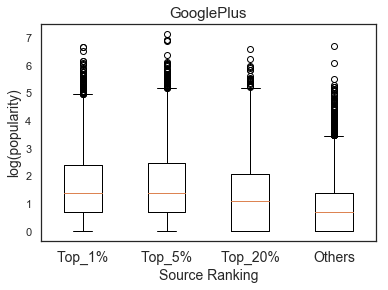

In [28]:
plt.boxplot([top_1_f, top_5_f, top_20_f,top_other_f]);
plt.xticks([1,2,3,4],['Top_1%', 'Top_5%', 'Top_20%','Others'], fontsize = 14);
plt.xlabel('Source Ranking',fontsize = 14)
plt.ylabel('log(popularity)',fontsize = 14)
plt.title('%s'%platform, fontsize = 15)

### Numerical correlation

In [ ]:
source_check.head(5)

In [ ]:
news_df.head(5)

### Create categorical labels for news popularity

In [29]:
thrsd_1 = int(len(news_df)*0.1) #17
thrsd_5 = int(len(news_df)*0.50) #69
thrsd_25 = int(len(news_df)*0.25)

def cal_thrsd(column):
    column = column.sort_values(ascending = False)
    return column.iloc[thrsd_1], column.iloc[thrsd_5], column.iloc[thrsd_25] 

facebook_thrsd = cal_thrsd(news_df.Facebook)
google_thrsd = cal_thrsd(news_df.GooglePlus)
link_thrsd = cal_thrsd(news_df.LinkedIn)

def create_rank(x, thrsd):
    if x>= thrsd[2]:
        return 'Top_25%_Rank'
    else:
        return 'Others'
# def create_rank(x, thrsd):
#     if x>=thrsd[0]:
#         return 'Top_10%_Rank'
#     elif x>= thrsd[1]:
#         return 'Top_25%_Rank'
#     elif x>= thrsd[2]:
#         return 'Top_50%_Rank'
#     else:
#         return 'Others'
    
news_df['Face_pop_rank'] = news_df['Facebook'].apply(lambda x: create_rank(x, facebook_thrsd))
news_df['Google_pop_rank'] = news_df['GooglePlus'].apply(lambda x: create_rank(x, google_thrsd))
news_df['LinkedIn_pop_rank'] = news_df['LinkedIn'].apply(lambda x: create_rank(x, link_thrsd))

In [30]:
news_df = news_df.merge(source_df, on = 'Source')

In [31]:
news_df.columns

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn', 'num_platform', 'num_platforms', 'Publish_Year',
       'Publish_Month', 'Publish_Day', 'Publish_weekday', 'Face_pop_rank',
       'Google_pop_rank', 'LinkedIn_pop_rank', 'num_post', 'source_rank'],
      dtype='object')

In [32]:
news_df.head(2)

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,...,num_platforms,Publish_Year,Publish_Month,Publish_Day,Publish_weekday,Face_pop_rank,Google_pop_rank,LinkedIn_pop_rank,num_post,source_rank
0,292.0,"Get ready for a ton of Fedspeak (DJIA, SPY, SP...",The US economy had a blockbuster October. US c...,Business Insider,economy,2015-11-08 13:07:00,-0.055902,-0.378927,27,2,...,3,2015,11,8,6,Others,Others,Others,471,Top_1%
1,64.0,"China is on the brink of a major milestone, an...","This brings us to China, the world's second-la...",Business Insider,economy,2015-11-09 00:00:00,0.108253,0.118766,177,7,...,3,2015,11,9,0,Others,Others,Top_25%_Rank,471,Top_1%


In [33]:
#Of all the top 1% popular news on facebook, how many of them are from different popularity rank of source? 
# news_df[news_df['Face_pop_rank']=='Top_25%'].source_rank.value_counts()
news_df[news_df['Google_pop_rank']=='Top_25%'].source_rank.value_counts()
news_df[news_df['LinkedIn_pop_rank']=='Top_25%'].source_rank.value_counts()
news_df[news_df['Face_pop_rank']=='Top_10%'].Source.value_counts()
news_df[news_df['Face_pop_rank']=='Top_10%'].Topic.value_counts()
news_df[news_df['LinkedIn_pop_rank']=='Top_50%'].Source.value_counts()
news_df[news_df['Google_pop_rank']=='Top_10%'].Source.value_counts()
news_df[news_df['LinkedIn_pop_rank']=='Top_10%'].Topic.value_counts()
news_df[news_df['Face_pop_rank']=='Top_10%'].sort_values(by = 'Facebook', ascending = False)

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,...,num_platforms,Publish_Year,Publish_Month,Publish_Day,Publish_weekday,Face_pop_rank,Google_pop_rank,LinkedIn_pop_rank,num_post,source_rank


In [34]:
news.columns

Index(['IDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       'LinkedIn', 'num_platform', 'num_platforms'],
      dtype='object')

In [35]:
news_select=news_df[['Topic', 'SentimentHeadline',
                     'SentimentTitle','source_rank','Publish_weekday']]

In [36]:
# news_select=news_df[['Topic','source_rank']]

In [37]:

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(news_select['Topic'])
lb_results_topic = pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_2 = lb.fit_transform(news_select['source_rank'])
lb_results_source = pd.DataFrame(lb_results_2, columns=lb.classes_)
predict = pd.concat([lb_results_topic, lb_results_source ], axis=1)
predictors = pd.concat([predict,news_select[['SentimentHeadline',
                     'SentimentTitle','Publish_weekday']] ], axis=1)

In [38]:
# # Create dummy variables 
# dummy = pd.get_dummies(news_select, columns=['Topic','source_rank'], drop_first=True, prefix='OH')
# # Print the columns names
# print(dummy.columns)

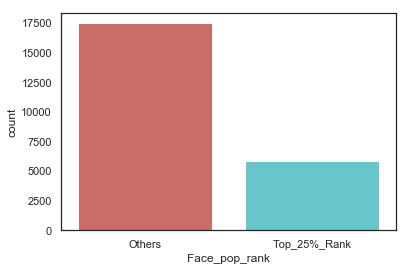

In [39]:
sns.countplot(x ='Face_pop_rank', data = news_df, palette = 'hls')
plt.show()

In [40]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [41]:
target=news_df[['Face_pop_rank','Google_pop_rank','LinkedIn_pop_rank']]

In [42]:
target.head(4)

,Face_pop_rank,Google_pop_rank,LinkedIn_pop_rank
0,Others,Others,Others
1,Others,Others,Top_25%_Rank
2,Top_25%_Rank,Top_25%_Rank,Others
3,Others,Top_25%_Rank,Top_25%_Rank


In [43]:
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
# Encoding the categorical variable
fit = target.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    target[i] = d[i].transform(target[i].fillna('NA'))

In [44]:
target.head(4)

,Face_pop_rank,Google_pop_rank,LinkedIn_pop_rank
0,0,0,0
1,0,0,1
2,1,1,0
3,0,1,1


In [45]:
X=predictors
y=target['Face_pop_rank']

In [46]:
X['Face_pop_rank']=target['Face_pop_rank']

In [47]:
X['LinkedIn_pop_rank']=target['LinkedIn_pop_rank']

In [48]:
X.to_csv('X.csv')

In [ ]:
y.value_counts()

In [49]:
y_Link = df_x ['LinkedIn_pop_rank']
y_Face = df_x ['Face_pop_rank']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
        X,y_Face , train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4362,    0],
       [   0, 1470]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

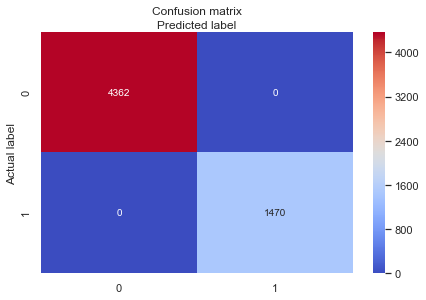

In [58]:
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)
average_precision

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc = multiclass_roc_auc_score(y_test, y_pred, average="macro")
print("Area under curve : ", auc)

In [ ]:
# Simple classification model
# RNN 

In [ ]:
def draw_roc_curve(y_test, y_proba):
    
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.plot(fpr,tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve ')
    plt.xlabel('False positive rate (1-Specificity)')
    plt.ylabel('True positive rate (Sensitivity)')
    plt.grid(True)
    
    return plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def build_logistic_regression(X_train,y_train,X_test,y_test):
    
    logreg = LogisticRegression()
    result=logreg.fit(X_train,y_train)
    y_pred_train = logreg.predict(X_train)
    y_pred_test = logreg.predict(X_test)
    
    print('Train accuracy score:',accuracy_score(y_train,y_pred_train))
    print('Test accuracy score:', accuracy_score(y_test, y_pred_test))
    
    print(confusion_matrix(y_test, y_pred_test))
    print('Precision score:', precision_score(y_test, y_pred_test))
    print('Recall score:', recall_score(y_test, y_pred_test))
    
    print(logreg.coef_)

    y_proba=logreg.predict_proba(X_test)[:,1]
    
   
    draw_roc_curve(y_test, y_proba)

 
    plt.show()

In [ ]:
X_train.head(3)

In [ ]:
###z怎么看系数是否显著

build_logistic_regression(X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
SVC_model =sklearn.svm.SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)
# Accuracy score is the simplest way to evaluate
print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(SVC_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
def feature_importance(X,y):
    
    clf = RandomForestClassifier()
    clf.fit(X,y)
     # Create the hyperparameter grid
    param_grid = {'max_features': ['auto', 'sqrt', 'log2']}
    # Call GridSearchCV
    grid_search = GridSearchCV(clf, param_grid)
    # Fit the model
    grid_search.fit(X, y)
    # Print the optimal parameters
    print(grid_search.best_params_)
    
    importances = clf.feature_importances_
    # Sort importances
    sorted_index = np.argsort(importances)
    # Create labels
    labels = X.columns[sorted_index]
    # Clear current plot
    plt.clf()
    # Create plot
    plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
    plt.show()
    

In [ ]:
feature_importance(X,y)

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(X_train, y_train)
y_pred_train = KNN_model.predict(X_train)
KNN_prediction = KNN_model.predict(X_test)
print('Train accuracy score:',accuracy_score(y_train,y_pred_train))
print('Test accuracy score:', accuracy_score(y_test,KNN_prediction))
print('Precision score:', precision_score(y_test, KNN_prediction))
print('Recall score:', recall_score(y_test, KNN_prediction))
y_proba=KNN_model.predict_proba(X_test)[:,1]
draw_roc_curve(y_test, y_proba)   

y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
    

In [ ]:
def build_RFC(X_train,y_train,X_test,y_test,X):
    
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    
    y_pred_test = clf.predict(X_test)
    
    y_proba=clf.predict_proba(X_test)[:,1]
    
    draw_roc_curve(y_test, y_proba)
    

    print('Train accuracy score:',accuracy_score(y_train,y_pred_train))
    print('Test accuracy score:', accuracy_score(y_test,y_pred_test))
    print('Precision score:', precision_score(y_test, y_pred_test))
    print('Recall score:', recall_score(y_test, y_pred_test))
    
    y_pred=logreg.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    class_names=[0,1,2,3]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    return pd.crosstab(y_test,pd.Series(y_pred_test),rownames=['ACTUAL'],colnames=['PRED'])

In [ ]:
build_RFC(X_train,y_train,X_test,y_test,X)